<a href="https://colab.research.google.com/github/iunoz/tes/blob/main/535230114.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [ ]:
# PREPROCESSING
df = pd.read_excel("Data Keiminalitas di Indonesia.xlsx", sheet_name="Sheet1")

In [ ]:
# Cek jumlah missing value pada dataset df
df.isna().sum()

BIRTH_PLACE_NM            0
Pekerjaan                 0
REGION                    0
NATIONALITY               0
LAW_ARTICLE_DESC          1
Education                 0
GolonganDarah             0
CASE_CLASSIFICATION    1326
Fisik                     0
Materi                    0
Verbal                    0
Hak_Asasi                 0
Negara                    0
Khalayak_Umum             0
Propinsi                  0
Unnamed: 15            2352
dtype: int64

In [ ]:
# Cek jumlah missing value pada dataset df (dalam persen)
df.isna().sum()/len(df)*100

BIRTH_PLACE_NM          0.000000
Pekerjaan               0.000000
REGION                  0.000000
NATIONALITY             0.000000
LAW_ARTICLE_DESC        0.042499
Education               0.000000
GolonganDarah           0.000000
CASE_CLASSIFICATION    56.353591
Fisik                   0.000000
Materi                  0.000000
Verbal                  0.000000
Hak_Asasi               0.000000
Negara                  0.000000
Khalayak_Umum           0.000000
Propinsi                0.000000
Unnamed: 15            99.957501
dtype: float64

In [ ]:
# Dikarenakan saya menggunakan provinsi Bali sebagai judul maka saya akan membuat missing value untuk provinsi diluar Bali
# Kategorikanlah dataset yang bukan bali
df_not_bali_province = df[df['Propinsi'] != 'Bali'].index

In [ ]:
# Pembuatan missing value untuk provinsi diluar Bali
df.loc[df_not_bali_province, 'Propinsi'] = np.nan

In [ ]:
# Cek jumlah missing value pada dataset yang telah diperbarui (dalam persen)
df.isna().sum()/len(df)*100

BIRTH_PLACE_NM          0.000000
Pekerjaan               0.000000
REGION                  0.000000
NATIONALITY             0.000000
LAW_ARTICLE_DESC        0.042499
Education               0.000000
GolonganDarah           0.000000
CASE_CLASSIFICATION    56.353591
Fisik                   0.000000
Materi                  0.000000
Verbal                  0.000000
Hak_Asasi               0.000000
Negara                  0.000000
Khalayak_Umum           0.000000
Propinsi               70.038249
Unnamed: 15            99.957501
dtype: float64

In [ ]:
# Menghapus bagian unnamed
df_no_unnamed = df.drop('Unnamed: 15', axis = 1)

In [ ]:
# Dikarenakan missing value melebihi 30% maka hapus missing valuenya dengan drop baris yang non bali
df_only_bali = df_no_unnamed.dropna(subset=['Propinsi'])

In [ ]:
df_only_bali.head()

,BIRTH_PLACE_NM,Pekerjaan,REGION,NATIONALITY,LAW_ARTICLE_DESC,Education,GolonganDarah,CASE_CLASSIFICATION,Fisik,Materi,Verbal,Hak_Asasi,Negara,Khalayak_Umum,Propinsi
14,Abiansemal,Swasta,Abiansemal,Indonesia,"Pasal 112 Ayat 1 UU No.35 Tahun 2009, tentang",Perguruan Tinggi (PT),A,NaN,N,N,N,N,N,Y,Bali
15,Denpasar,Swasta,Dauh Puri,Indonesia,Pasal 363 :KUHP,Sekolah Menengah Atas atau sederajat (SMA),O,Pencurian,N,Y,N,N,N,N,Bali
16,Jakarta,Swasta,Dauh Puri Kelod,Indonesia,"Pasal 112 Ayat 1 UU No.35 Tahun 2009, tentang",Sekolah Menengah Atas atau sederajat (SMA),A,NaN,N,N,N,N,N,Y,Bali
17,Denpasar,Pelajar / Mahasiswa,Peguyangan Kangin,Indonesia,Pasal 44 ayat (1) UU No.23/2004 tentang Pengha...,Sekolah Menengah Pertama atau sederajat (SMP),O,Kdrt,Y,N,N,N,N,N,Bali
19,DENPASAR,Wiraswasta,Ubung,Indonesia,Pasal 378 :KUHP,Sekolah Menengah Atas atau sederajat (SMA),A,Penipuan,N,Y,N,N,N,N,Bali


In [ ]:
# Cek missing value dataframe yang berisi hanya bali (dalam persen)
df_only_bali.isna().sum()/len(df)*100

BIRTH_PLACE_NM          0.000000
Pekerjaan               0.000000
REGION                  0.000000
NATIONALITY             0.000000
LAW_ARTICLE_DESC        0.000000
Education               0.000000
GolonganDarah           0.000000
CASE_CLASSIFICATION    21.631959
Fisik                   0.000000
Materi                  0.000000
Verbal                  0.000000
Hak_Asasi               0.000000
Negara                  0.000000
Khalayak_Umum           0.000000
Propinsi                0.000000
dtype: float64

In [ ]:
# Simpan dataset yang telah dimodifikasi ke file excel baru di lokal
output_filename = "Data_Keiminalitas_Cleaned_535230114.xlsx"
df_only_bali.to_excel(output_filename, index=False)

In [ ]:
# PROCESSING
df = pd.read_excel('Data_Keiminalitas_Cleaned_535230114.xlsx')

# Membuat tabel kontingensi untuk melihat frekuensi kombinasi pendidikan dan kasus kriminalitas
contingency_table = pd.crosstab(df['Education'], df['CASE_CLASSIFICATION'])

# Menampilkan tabel kontingensinya
print("Tabel Kontingensi: ")
print(contingency_table)

# Melakukan uji chi-squared untuk independensi
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Menghitung nilai kritis
alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, dof)

# Menampilkan hasil uji chi squared-nya
print("\nHasil Uji Chi-Squared:")
print("Chi-Squared:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Nilai Kritis (alpha = 0.05):", critical_value)
print("Expect Frequencies:")
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print(expected_df)

# Menyimpan tabel kontingensi dan hasil chi-squared ke dalam file Excel di sheet yang berbeda
with pd.ExcelWriter('Processing_Contingency_Table_Chi-Squared_535230114.xlsx') as writer:
    contingency_table.to_excel(writer, sheet_name='Contingency Table', index_label=['Education', 'CASE_CLASSIFICATION'])
    chi_squared_results = pd.DataFrame({
        'Statistic': ['Chi-Squared', 'p-value', 'Degrees of Freedom', 'Critical Value'],
        'Value': [chi2, p, dof, critical_value]
    })
    chi_squared_results.to_excel(writer, sheet_name='Chi-Squared Results', index=False)
    expected_df.to_excel(writer, sheet_name='Expected Frequencies')

Tabel Kontingensi: 
CASE_CLASSIFICATION                            Hak Cipta  Kdrt  Kehutanan  \
Education                                                                   
Perguruan Tinggi (PT)                                  0     0          0   
Sekolah Dasar atau sederajat (SD)                      2     0          0   
Sekolah Menengah Atas atau sederajat (SMA)             0     1          0   
Sekolah Menengah Pertama atau sederajat (SMP)          0     2          1   
Tidak Sekolah                                          0     0          1   

CASE_CLASSIFICATION                            Kekerasan  Kesehatan  MIGAS  \
Education                                                                    
Perguruan Tinggi (PT)                                  1          0      0   
Sekolah Dasar atau sederajat (SD)                      2          1      0   
Sekolah Menengah Atas atau sederajat (SMA)            13         23      3   
Sekolah Menengah Pertama atau sederajat (SMP)     

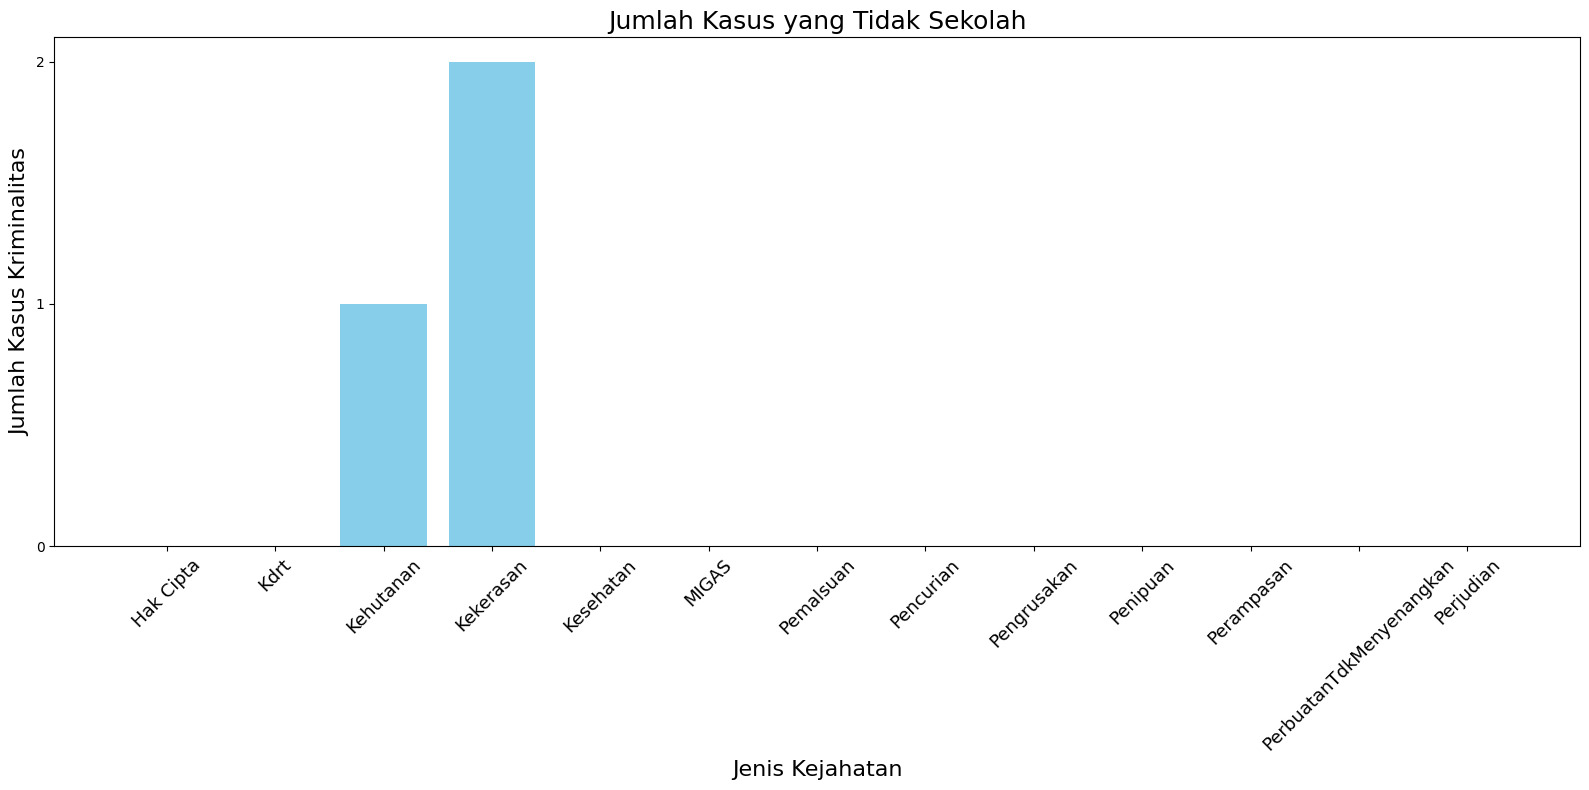

In [ ]:
# Plot untuk yang "Tidak Sekolah"
education_level = "Tidak Sekolah"
education_data = contingency_table.loc[education_level]

# Membuat barplot
plt.figure(figsize=(16, 8))
plt.bar(education_data.index, education_data.values, color='skyblue')
plt.title(f"Jumlah Kasus yang {education_level}", fontsize=18)
plt.xlabel("Jenis Kejahatan", fontsize=16)
plt.ylabel("Jumlah Kasus Kriminalitas", fontsize=16)
plt.xticks(rotation=45, fontsize=13)

# Increment 1
plt.gca().yaxis.set_major_locator(MultipleLocator(1))

plt.tight_layout()

# Simpan grafik
plt.savefig(f'Jumlah_Kasus_Tidak_Sekolah.png')

# Tunjukkan grafik
plt.show()

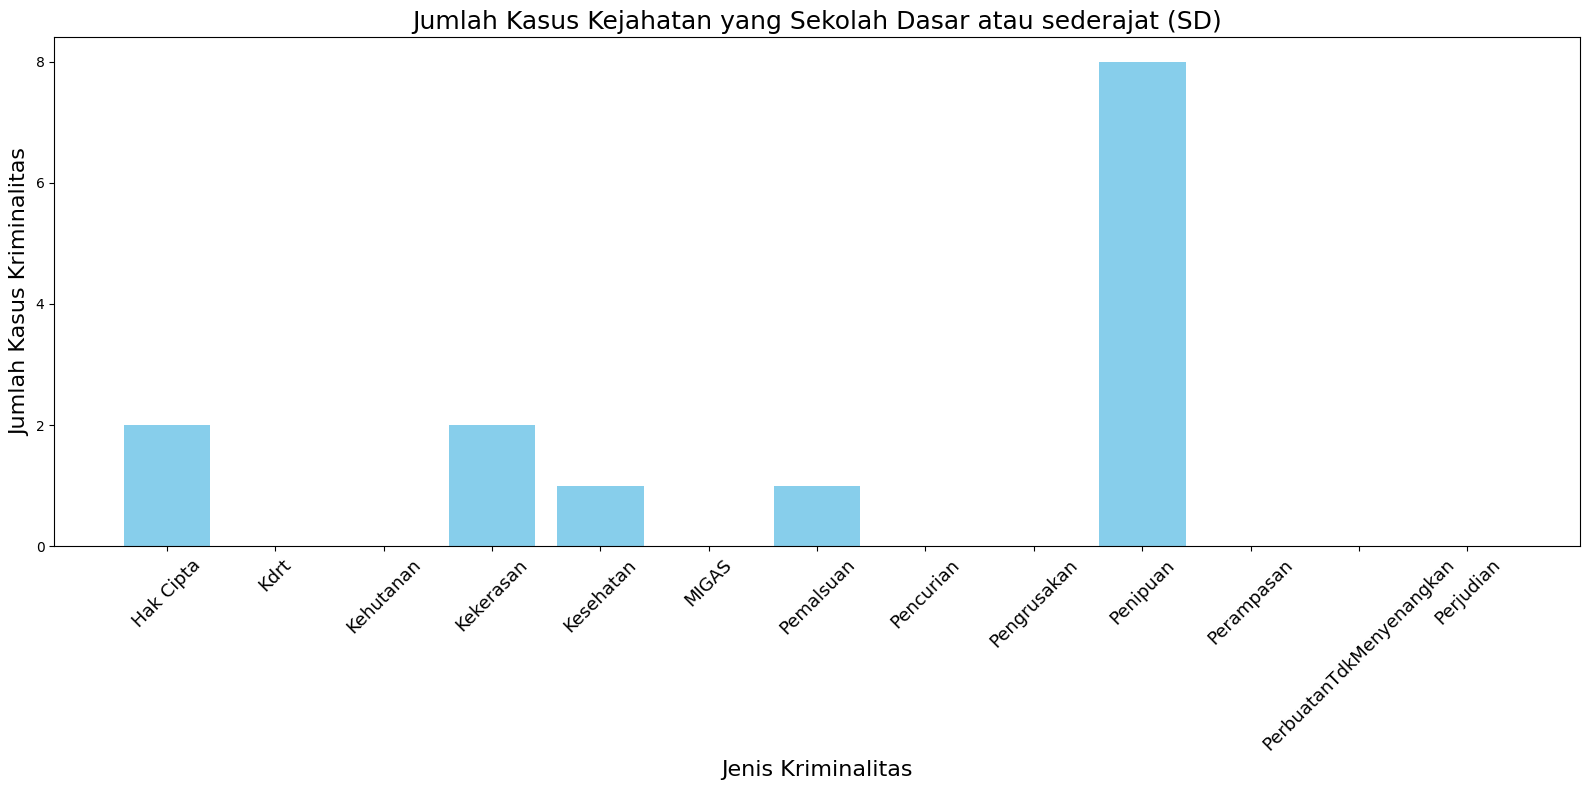

In [ ]:
# Plot untuk yang "Sekolah Dasar atau sederajat (SD)"
education_level = "Sekolah Dasar atau sederajat (SD)"
education_data = contingency_table.loc[education_level]

# Membuat barplot
plt.figure(figsize=(16, 8))
plt.bar(education_data.index, education_data.values, color='skyblue')
plt.title(f"Jumlah Kasus Kejahatan yang {education_level}", fontsize=18)
plt.xlabel("Jenis Kriminalitas", fontsize=16)
plt.ylabel("Jumlah Kasus Kriminalitas", fontsize=16)
plt.xticks(rotation=45, fontsize=13)

# Increment 2
plt.gca().yaxis.set_major_locator(MultipleLocator(2))

plt.tight_layout()

# Simpan grafik
plt.savefig(f'Jumlah_Kasus_SD.png')

# Tunjukkan grafik
plt.show()

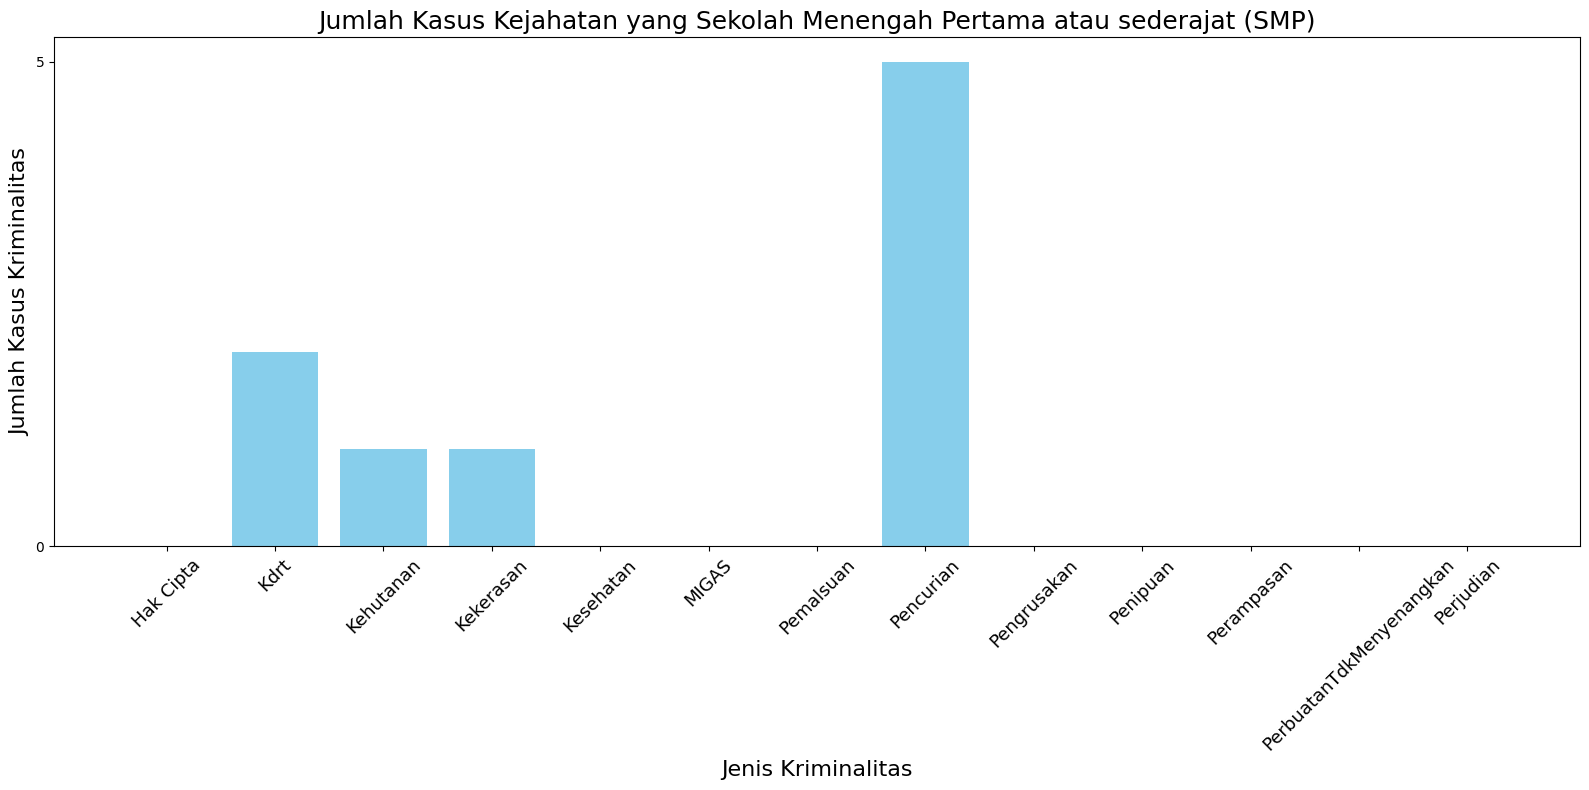

In [ ]:
# Plot untuk yang "Sekolah Menengah Pertama atau sederajat (SMP)"
education_level = "Sekolah Menengah Pertama atau sederajat (SMP)"
education_data = contingency_table.loc[education_level]

# Membuat barplot
plt.figure(figsize=(16, 8))
plt.bar(education_data.index, education_data.values, color='skyblue')
plt.title(f"Jumlah Kasus Kejahatan yang {education_level}", fontsize=18)
plt.xlabel("Jenis Kriminalitas", fontsize=16)
plt.ylabel("Jumlah Kasus Kriminalitas", fontsize=16)
plt.xticks(rotation=45, fontsize=13)

# Increment 5
plt.gca().yaxis.set_major_locator(MultipleLocator(5))

plt.tight_layout()

# Simpan grafik
plt.savefig(f'Jumlah_Kasus_SMP.png')

# Tunjukkan grafik
plt.show()

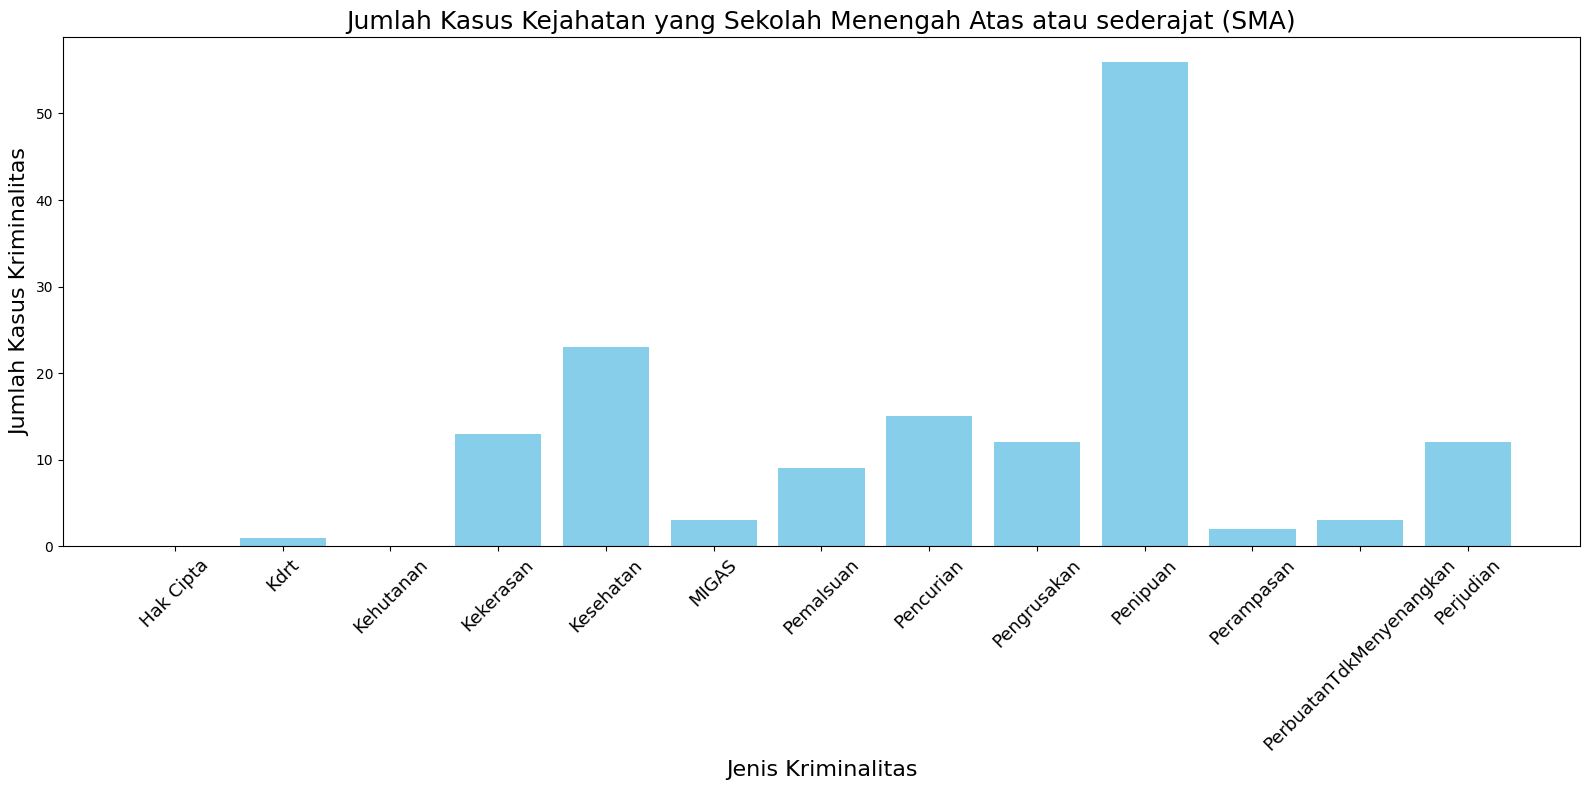

In [ ]:
# Plot untuk yang "Sekolah Menengah Atas atau sederajat (SMA)"
education_level = "Sekolah Menengah Atas atau sederajat (SMA)"
education_data = contingency_table.loc[education_level]

# Membuat bar plot
plt.figure(figsize=(16, 8))
plt.bar(education_data.index, education_data.values, color='skyblue')
plt.title(f"Jumlah Kasus Kejahatan yang {education_level}", fontsize=18)
plt.xlabel("Jenis Kriminalitas", fontsize=16)
plt.ylabel("Jumlah Kasus Kriminalitas", fontsize=16)
plt.xticks(rotation=45, fontsize=13)
plt.tight_layout()

# Simpan grafik
plt.savefig(f'Jumlah_Kasus_SMA.png')

# Tunjukkan grafik
plt.show()

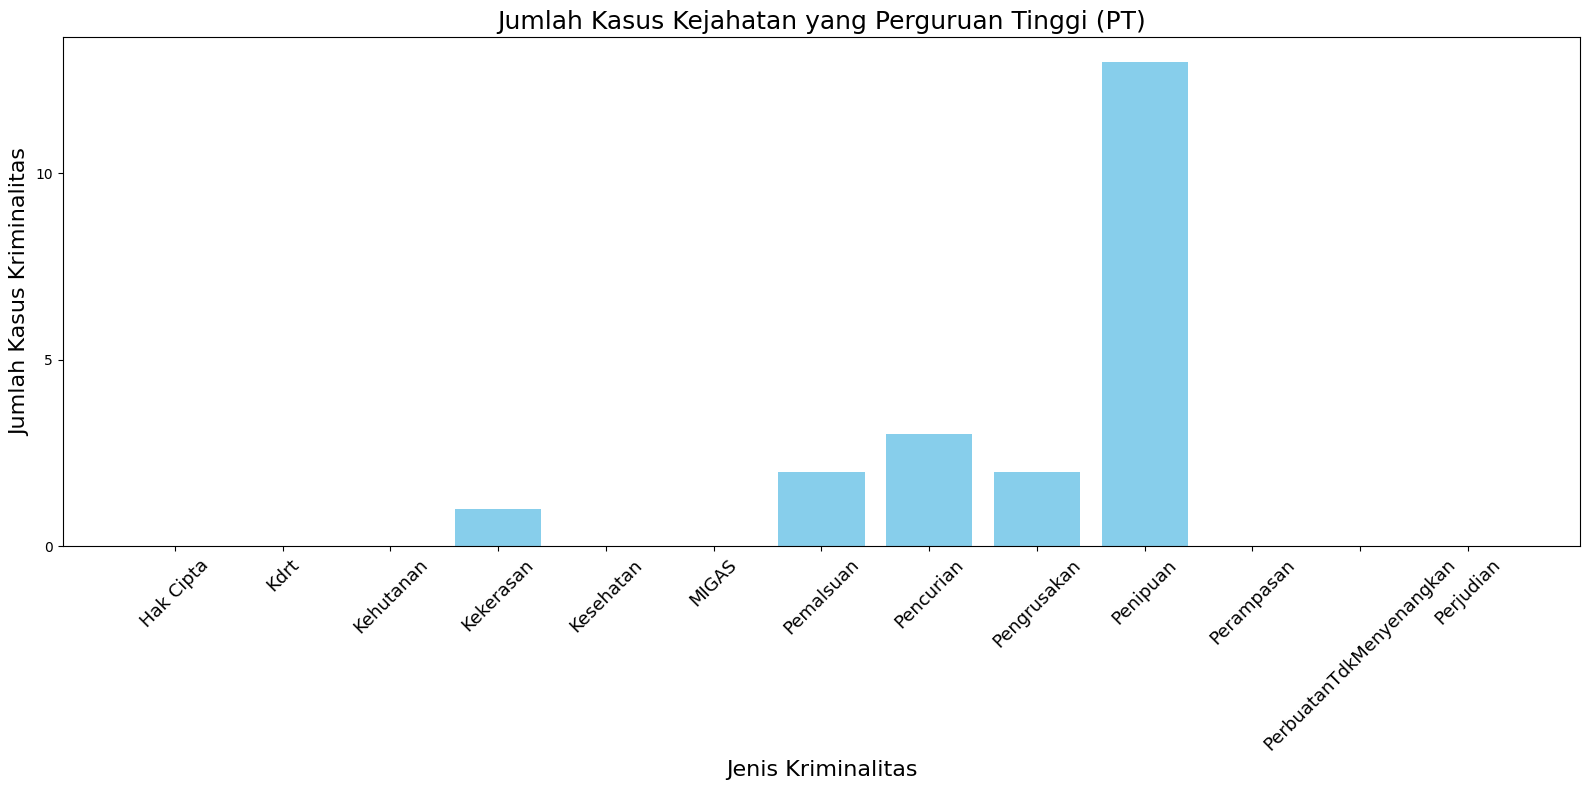

In [ ]:
# Plot untuk yang "Perguruan Tinggi (PT)"
education_level = "Perguruan Tinggi (PT)"
education_data = contingency_table.loc[education_level]

# Membuat barplot
plt.figure(figsize=(16, 8))
plt.bar(education_data.index, education_data.values, color='skyblue')
plt.title(f"Jumlah Kasus Kejahatan yang {education_level}", fontsize=18)
plt.xlabel("Jenis Kriminalitas", fontsize=16)
plt.ylabel("Jumlah Kasus Kriminalitas", fontsize=16)
plt.xticks(rotation=45, fontsize=13)

# Increment 5
plt.gca().yaxis.set_major_locator(MultipleLocator(5))

plt.tight_layout()

# Simpan grafik
plt.savefig(f'Jumlah_Kasus_PT.png')

# Tunjukkan grafik
plt.show()